In [1]:
%matplotlib inline

In [2]:
from scipy.stats import logistic
import numpy as np
import matplotlib.pyplot as plt

from aptos.model import rolloff, sin_decay

## Warmup / Rolloff

In [3]:
def warmup_rolloff(start_lr, peak_lr, peak_epoch, final_lr, final_epoch):
    # warmup from start to peak
    lrs = np.zeros((final_epoch,))
    lrs[0:peak_epoch] = np.linspace(start_lr, peak_lr, peak_epoch)
    
    # setup rolloff params
    length = final_epoch - peak_epoch
    magnitude = peak_lr - final_lr
    
    # rolloff to final
    rolloff_lrs = rolloff(length, magnitude=magnitude, offset=final_lr)
    lrs[peak_epoch:] = rolloff_lrs
    return lrs

In [4]:
start_lr = 0.0001
peak_lr = 0.01
peak_epoch = 3
final_lr = 0.00001
final_epoch = 20

In [5]:
lrs = warmup_rolloff(start_lr, peak_lr, peak_epoch, final_lr, final_epoch)
lrs

array([0.0001    , 0.00505   , 0.01      , 0.00993314, 0.00988024,
       0.00978638, 0.00962179, 0.00933896, 0.00886949, 0.00813334,
       0.00707602, 0.00573431, 0.00427569, 0.00293398, 0.00187666,
       0.00114051, 0.00067104, 0.00038821, 0.00022362, 0.00012976])

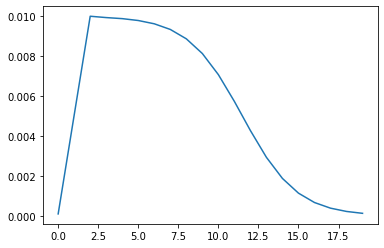

In [6]:
plt.plot(lrs)

## Decaying sinusoid

In [7]:
offset = 0.5
amplitude = 3
n_periods = 3.75
n_epochs = 100
gamma = 0.97

In [8]:
sin = sin_decay(offset, amplitude, n_periods, n_epochs, gamma)

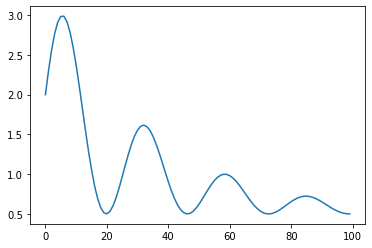

In [9]:
plt.plot(sin)